# 北尾早霧・砂川武貴・山田知明『定量的マクロ経済学と数値計算』日本評論社
## 第2章：2期間モデル・3期間モデルと数値計算の概観

## 数値計算に入る前にNotebookの使い方について簡単に説明
* **Jupyter noterbook**と**Jupyter lab**の2種類がある
    * インストール方法はNotionで説明
* どちらを使っても構わない
    * 現時点ではJupter notebookの方が完成度は高い
        * スライドを作成できるRISEなどの機能が揃っている
    * Jupyter labの方が新しいため新機能はこちらに追加される

## Jupyter notebookの使い方
* セル内に**数式**を書いて**実行**をすることでコードを走らせることが出来る
    * 実行は⬆にある▷ボタンを押すか、セルを選択して**Shift + Return (Enter)**
* セルに説明書きを加えたりメモを取ることも可能
    * 上にあるタブをCode→**Markdown**に変更
    * 実行は同じく**Shift + Return (Enter)**
* 書き方はMarkdown記法
* 数式の書き方は$\LaTeX$の記法と同じ

---

In [15]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]


---

## 2.2 ベンチマークモデルとカリブレーション

### 2.2.1 ベンチマークモデル：2期間モデル
* 詳細はテキストを参照
* 基本的な2期間モデルを使って数値計算の基本的な考え方を丁寧に説明をしていく
* ある経済主体は2期間生存するとしよう
    * 1期目の消費$c_{1}$と貯蓄$a$、2期目の消費$c_{2}$を決定：実際にはどれか一つを決定すれば他は予算制約から自動的に決定
    * 労働供給に関する意思決定はなし
* 予算制約：1期目
$$
    c_{1} + a = w
$$
    * wは1期期初に保有している所得
* 予算制約：2期目
$$
    c_{2} = (1+r)a
$$
    * 貯蓄には$r$だけの金利が発生する
* 経済主体の目的関数は2期間の効用の和を最大にすること
$$
    U(c_{1}, c_{2}) = u(c_{1}) + \beta u(c_{2})
$$
    * $\beta$は**割引因子(discount factor)**

### 一階条件
$$
    u'(c_{1}) = (1+r) \beta u'(c_{2})
$$
### 政策関数
* 我々が知りたいのは**政策関数(policy function)**
$$
    a = g(w)
$$

---

## 2.2.2 カリブレーション（Calibration）
* 関数型を特定化してパラメータを設定する一連の作業を**カリブレーション（calibration）**と呼ぶ
* 本格的な研究の場合、ここの値をもっと真面目に設定
    * マクロ・ミクロデータから推計
* 今回はデモンストレーションなので"それっぽい"数値を使う

---

#### Tips：コメント
* #(シャープ)の右側は実行されない：**コメント**と呼ぶ
* コメントを適切につけることを心がけると**共同研究者**や**未来の自分**が助かる
* コメントは極力英語(半角)で書いたほうが良い
    * この教科書は教育目的なので日本語で書いています
* 実行する箇所に全角が交じるとコードが動かなくなる場合があるので注意
    * 全角スペースは特に見つけづらいので注意が必要
    * たまにあるミス：カギ括弧が片方だけ全角

In [16]:
# 変数名はモデルと同じ名前にすると読みやすい(がマストではない)
beta = 0.985**30 # 割引因子(discount factor) 30年分
gamma = 2.0 # 相対的危険回避度

#### Tips：JuliaはUnicode（UTF-8）に対応しているのでギリシャ文字がそのまま使える
* 他の多くの言語ではこの方法は使えない

In [17]:
# \betaと書いてTabキーを押すとギリシャ文字に変換
β = 0.985**30 # 割引因子(discount factor) 30年分

In [18]:
γ = 2.0 # 相対的危険回避度(relative risk aversion)

In [19]:
rent = 1.025**30 - 1.0 # 30年分の利息(1を引いているので純(net))          

---

## 2.3 離散近似とグリッド
* 状態変数$w$を離散個の点で表現する→**グリッド(grid)**
* グリッドは点の集まり
    * 例えばグリッド数を10個にする場合：$w_{i} \in \{ w_1, ..., w_{10} \}$
    * $w_{1}$：所得の最小値
    * $w_{10}$：所得の最大値

In [20]:
# Pythonの場合は、実行分の最後に;を書かなくても実行結果は表示されない
# (JuliaやMatlabは表示されてしまう)

nw = 10 # グリッドの数
w_min = 0.1 # 所得の最小値
w_max = 1.0 # 所得の最大値

### numpy.linspace 関数を使ってグリッド生成

In [21]:
# グリッドを生成するためにnumpyというモジュール(パッケージ)の中にあるlinspaceという関数を使う
# このためにはまずnumpyモジュールを呼び出さなくて(インポートしなくて)はならない

import numpy as np # numpyモジュールをnpという名前でインポートする

# w_minからw_maxまでの範囲でnw個の点を生成する
# 今回の場合、0.1から1.0まで10個の点を生成

temp = np.linspace(w_min,w_max,nw)

---

## Tips：関数となにか?

`np.linspace`は**関数(function)**
* 関数名(引数, 引数)という感じで使う
    * 関数の中に入れるインプットのことを**引数（argument）**と呼ぶ
    * `z = function_name(x, y)`のような感じで使う
* 関数の機能が知りたい場合、?やhelp(関数名)でヘルプを呼び出す

In [22]:
? np.linspace
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 

Signature:
 np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fal

### Pythonにおける関数（function）
* 言語によって**サブルーチン(subroutine)**と呼ばれることもある(Fortranとか)
    * 正確にはFortranでは一つの変数を返すものを関数(function)、複数のインプットとアウトプットがあるものをサブルーチン(subroutine)と呼んでいる
* **関数**：プログラムを一つの単位で区切ったもの
* 頻繁に使う計算は意味単位で関数としてひとまとめにして何回も呼び出す形にしたほうが良い
    * 経済学の場合、Cobb-Douglas型生産関数、CRRA型効用関数など
    * ⬇で実際に効用関数や生産関数を例示
* 他人が書いたコードを再利用しやすくなる！
    * Packageでインストールしたものも他人が書いたコード(の一部)
    * 上のnp.linspaceも関数
    * 他人（あるいは自分）が書いた関数をまとめたものを**ライブラリ（library）**と呼ぶ
    * ライブラリの充実度がその言語が何に向いているのかを決定する上で重要
        * 例：Pythonは機械学習のライブラリが充実している

## Tips：変数の型（Type）について
* 上で**64ビットの浮動小数点（Float64）**という謎の単語が出てきた
* Pythonでは変数の**型（type）**を意識したほうが良いのでここで説明
* 変数の型という概念は別の言語でもある
    * Julia、C++、Fortran etc.
    * MatlabやRでは気にしなくてもOK
* 初心者のうちはそこまで気にしなくてもコードは動く
* **変数の型を気にかけた方が効率的（=計算速度が早い）に実行が出来る**

In [23]:
# この2つは別モノ!
a = 1 # 整数(integer)
b = 1.0 # 浮動小数点(float)

In [24]:
type(a)

int

In [25]:
type(b)

float

* 1(整数)と1.0(浮動小数点)は別物!
* Python の方ではJulia等と違ってビット数は明示されないが、**64ビットで表現している**
    * numpy等では明示的に整数や浮動小数点のビット数を指定できる。
    * この数字が大きいと有効桁数数が大きくなる
    * よほど古いPCや特殊な環境出ない限り32ビットではなく、64ビットで表示されているはず

In [26]:
# 計算をする場合は自動で調整してくれる
# 言語によって仕様が異なる可能性あり
a + b
type(a + b)

float

In [27]:
# スカラー
c = 3.0

In [28]:
# ベクトル
d = np.array([1.0, 2.0])

array([1., 2.])

In [62]:
# 行列(Pythonでは行列をNumPyを使うと便利)
e = np.array([[1,2,3],[4,5,6]])
e

array([[1, 2, 3],
       [4, 5, 6]])

In [65]:
# 別の行列
f = np.array([[1.0,2.0,3.0],[4.0,5.0,6.0]])

array([[1., 2., 3.],
       [4., 5., 6.]])

In [66]:
type(c)

float

In [76]:
type(d) # NumPyを用いた配列(ベクトルや行列)はnumpy.ndarray

numpy.ndarray

In [79]:
type(e)
e.dtype # numpy配列.dtype とすると配列の要素の型が分かる

dtype('int32')

In [81]:
type(f)
f.dtype # こちらはArrayの要素がintではなくfloat

dtype('float64')

#### Tips：Matlabと違ってベクトルと行列に本質的な違いはない
* 1次元の配列か2次元の配列かの違いでしかない
* より高次元の配列も定義出来る↓

In [85]:
temp = np.zeros((5, 3, 4)); # 5×3×4の配列

#### Tips：有効桁数と64ビットの意味
* コンピュータは表示できる桁数に限界がある
* コンピュータは無限を認識してくれない
* 例えば、64ビットで表現させる整数の**最大値**は↓
* あえて使うことはないかと思うが、32ビットだと表示できる数値の上限が小さくなるので注意

In [90]:
print(sys.maxsize)
# intの場合は上限値はないらしい

9223372036854775807


## 2.3.3 状態変数と操作変数が共に離散の場合
* 操作変数$a$についても離散個のグリッドを設定

In [91]:
# 操作変数aのグリッドも作成
na = 40
a_max = 1.0
a_min = 0.025

In [92]:
grid_a = np.linspace(a_min,a_max,na)
grid_a

array([0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225,
       0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 ,
       0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675,
       0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  ,
       0.925, 0.95 , 0.975, 1.   ])

## Tips：数値計算誤差について
* ⬆ コンピュータは0.175や0.275が正確に表現出来ない

### 注意
* 上で0.175や0.8あたりの表示がおかしくなっているはず（環境によって表示は異なるかも）
* これはコンピュータ上で小数をどのように表現するかの問題で、実は0.8そのものは表現できない
    * コンピュータは2進数なのでこのような問題が生じる
    * これはPythonに特有の問題ではなくすべてのソフトウェアに共通する問題
* ほとんどの場合は気にしなくても問題は生じないけど、ごくまれにこれが積み上がっていって悪さをしたりする可能性もある

## Tips：自分で関数を作ってみる
* 経済学でよく使う関数を自力で作成してみよう
    * 毎回直接書くのは面倒なので!

**CRRA型効用関数**
$$
    \frac{c^{1-\gamma}}{1-\gamma}
$$
を計算する関数を作ってみよう
* $\gamma = 1$の場合、$\log c$である点に注意

In [93]:
cons = 3.0
utility = cons**(1-γ) / (1-γ)
utility

-0.3333333333333333

毎回、⬆みたいな式を書くのは大変
* コピペも面倒
* しかも、間違いがあったらコピペをした全部の箇所を訂正しないといけなくなる
    * たとえば、うっかり$(1+\gamma)$と書いてしまってあっちこっちにコピペをしたら...

### 関数にまとめる
* 関数は⬇のように書く
* `def`の後に関数名（今回の場合はCRRA）をつける(defとendで挟む必要はない)
* ``( )``の中に引数を書く
    * 複数あっても良いし、まったく引数がない関数もある
    * 今回だと`cons`と`\gamma`
* ``( )``の後に``:``(コロン)を書く
* ⬇のセルを実行しても`CRRA`としか表示されない

In [94]:
def CRRA(cons,γ):
    """
    "機能の説明を書くスペース"
    効用関数を計算(この関数はどう使うのか。目的や使いみちを書いておく。)
    
    ### インプット(書かなくても機能上は問題ないけど、ヘルプにインプットとアウトプットの情報が書いてあったほうが便利)
    `cons::Real` 消費,
    `γ::Real` 相対的リスク回避度
    ### アウトプット(同上)
    効用
    """
    if γ != 1.0: # 条件分岐の際も:(コロン)を条件文の後に書く
        return cons**(1.0 - γ) / (1.0 - γ)
    else:
        return np.log(cons)

### Tips：if文
* 条件を分岐
* もしAならば〜、もしそうでなければ〜
* もしAならば〜、あるいはBならば〜、あるいはCならば〜

In [95]:
if γ != 1.0: # もし\gammaが1でないならば...
    print(cons**(1.0 - γ) / (1.0 - γ))
else: # そうでないならば...
    print(np.log(cons))

-0.3333333333333333


---

### Tips：プログラミングでは=は"イコール"ではない
* a=1：aに1を入れなさい
* a==1：aと1が等しいかどうかをチェック
    * 結果はtrueかfalseのどちらか

In [96]:
a = 1
a

1

In [97]:
a == 1

True

---

#### 自作の関数がきちんと動くかを確認してみよう
* 自分の関数に注をつけたのでhelp機能で確認をすることが出来るようになる
* 注意：事前に実行をする必要あり

In [98]:
cons = 3.0
γ = 2.0
CRRA(cons,γ)

-0.3333333333333333

In [99]:
help(CRRA)

Help on function CRRA in module __main__:

CRRA(cons, γ)
    "機能の説明を書くスペース"
    効用関数を計算(この関数はどう使うのか。目的や使いみちを書いておく。)
    
    ### インプット(書かなくても機能上は問題ないけど、ヘルプにインプットとアウトプットの情報が書いてあったほうが便利)
    `cons::Real` 消費,
    `γ::Real` 相対的リスク回避度
    ### アウトプット(同上)
    効用



In [100]:
# 何回も数式を書かなくてもよくなる
util1 = CRRA(1.0, 2.0)
util2 = CRRA(2.0, 2.0)
util3 = CRRA(3.0, 2.0)

---

## 横道：引き続き、Cobb-Douglas型生産関数を作成
$$
Y = Z K^{\alpha} L^{1-\alpha}
$$

In [101]:
# やはり毎回書くのは面倒
totalfactorproductivity = 1.0
aggregate_capital = 3.0
aggregate_labor = 1.2
α = 0.3
Y = totalfactorproductivity * aggregate_capital**α * aggregate_labor**(1-α)

In [102]:
def CobbDouglas(capital, labor, α, tfp = 1.0):
    """
    Purpose:
    Cobb-Douglas type production function.
    
    ### Input
    capital: aggregate capital,
    labor: aggregate labor
    α: capital share,
    tfp: total factor productivity (optional).
    
    ### Output
    y: GDP
    """
    y = tfp * capital**α * labor**(1- α)
    return y

In [103]:
help(CobbDouglas)

Help on function CobbDouglas in module __main__:

CobbDouglas(capital, labor, α, tfp=1.0)
    Purpose:
    Cobb-Douglas type production function.
    
    ### Input
    capital: aggregate capital,
    labor: aggregate labor
    α: capital share,
    tfp: total factor productivity (optional).
    
    ### Output
    y: GDP



In [104]:
Z = 1.0; # TFPを1に基準化
capital = 2.0;
labor = 1.5;
α = 0.4; # 資本分配率
y = CobbDouglas(capital, labor, α, Z)

---

## Tips：関数を高速化するためには変数の型を予め宣言しておくと良い
* ⬆の書き方だとcapitalに2(Int)を入れても2.0(Float)でも問題ない
    * でもJuliaの内部でひと手間かかっている
* ⬇の書き方場合、capitalやlaborにはfloatしか入れられない
    * 別の型を引数にしようとするとエラー
    * Pythonの負担が少し減る
    * Pythonにおけるfloatはfloat64と等価(Juliaでは::Float64と型指定している)
* 今回みたいな簡単な計算では差は実感できないけど、もっと長い計算の場合には差が出てくる場合がある

In [105]:
def CobbDouglas2(capital:float, labor:float, α:float, tfp:float=1.0):
    y = tfp * capital ** α * labor**(1- α)
    return y

In [106]:
y = CobbDouglas2(capital, labor, α)

In [107]:
capital_int = 2 # Pythonの場合は引数が指定した型と異なってもエラーを出さない
y = CobbDouglas2(capital_int, labor, α)

## 関数化した強み：まとめて計算してみる
* 資本と労働それぞれ51種類、総計で2601種類の組み合わせで生産量を計算

In [108]:
# np.arange を使う
# np.arange(a,b,step) は a<= x < b の範囲でstep個の等差数列を出力する。但しbは含まれない(a~b-stepの範囲で等差数列を求めている)。
# bを含むためには第2引数(endpoint)をb+stepとする。

k = np.arange(0,5+0.1,0.1); # 0から5までを0.1刻みにしたベクトル
l = np.arange(0,5+0.1,0.1)

In [109]:
nk = len(k) # ｋの要素数
nl = len(l) # lの要素数

In [110]:
# 空っぽの変数を定義
# 未定義の変数のサイズをループで大きくしていくと計算速度が大幅に低下するので事前に準備

y = np.zeros((nk,nl))

for i in range(nk):
    for j in range(nl):
        y[i, j] = CobbDouglas(k[i], l[j], α, Z)

## Tips：構造体(struct)を使ってモデルのパラメータをひとまとめにする
* **必須ではない**けど知っておくと便利
* ⬇みたいにバラバラに変数の設定をすると、どんどん変数が増えていく
    * 巨大なモデルを計算する際、関数の引数が大量になるとコードが読みにくくなる
    * かといってグローバル変数は極力使いたくない

In [111]:
β = 0.985**30
γ = 2.0
rent = 1.025**30 - 1.0
nw = 10
w_max = 1.0
w_min = 0.1
na = 40
a_max = 1.0
a_min = 0.025

grid_w = np.linspace(w_min,w_max,nw)
grid_a = np.linspace(a_min,a_max,na)

#### そこで色々な変数をまとめた一つの大きな変数を作る
* 関数を呼び出した際のやりとりはその変数一つで済む
* **構造体（class）**というものを作る

In [112]:
class Models:
    def __init__(self,β:float,γ:float,rent:float,nw:int,w_max:float,w_min:float,grid_w:"np.ndarray[np.float64]",na:int,a_max:float,a_min:float,grid_a:"np.ndarray[np.float64]"):
        # パラメータ
        self.β = β # 割引因子
        self.γ = γ # 相対的危険回避度

        # 要素価格
        self.rent = rent # 純利子率

        # グリッド
        self.nw = nw # 所得グリッドの数
        self.w_max = w_max # 所得グリッドの最大値
        self.w_min = w_min # 所得グリッドの最小値 
        self.grid_w = grid_w # 所得グリッド
        self.na = na # 貯蓄グリッドの数
        self.a_max = a_max # 貯蓄グリッドの最大値
        self.a_min = a_min # 貯蓄グリッドの最小値
        self.grid_a = grid_a # 貯蓄グリッド

In [113]:
# class の使い方
Models(β, γ, rent, nw, w_max, w_min, grid_w, na, a_max, a_min, grid_a)

In [114]:
def Calibration():
    # パラメータはここで設定をする
    β = 0.985**30
    γ = 2.0
    rent = 1.025**30 - 1.0
    nw = 10
    w_max = 1.0
    w_min = 0.1
    na = 40
    a_max = 1.0
    a_min = 0.025

    grid_w = np.linspace(w_min,w_max,nw)
    grid_a = np.linspace(a_min,a_max,na)

    return Models(β, γ, rent, nw, w_max, w_min, grid_w, na, a_max, a_min, grid_a)

In [115]:
# paramsという変数に色々な変数をひとまとめにする
params = Calibration()

#### 構造体の使い方は簡単

In [116]:
# 欲しい変数だけ取り出す方法
params.β

0.6354580927313491

In [117]:
params.rent

1.0975675790817858

---

## 2.3.3 状態変数と操作変数が共に離散の場合
* 話をもどして、ようやく数値計算の本筋に入っていこう！

2期目の消費は
$$
    c_{2} = (1+r)a
$$
なので、aのグリッドに対応した効用を確認してみよう

In [56]:
# 2期の効用関数として取りうる値
util2 = CRRA((1.0 + params.rent)*params.grid_a, params.γ)

#### Tips：上の書き方では関数のブロードキャストという方法を使っている
* 関数`CRRA(c, \gamma)`の変数cと\gammaはスカラーである必要がある
* `CRRA(cのベクトル, \gamma)`とすると、スカラーではなく、ベクトルのそれぞれの値に対応したCRRA関数を計算をするという形になる
    * `model.grid_a`はスカラーではなく⬆で定義したベクトルである点に注意
    * ループ計算(後述)でも計算出来るけど、こちらのほうが簡潔にコードを書くことが出来る
    * JuliaやMatlabの場合、CRRA.(cのベクトル,\gamma)とする必要があるが、Pythonの場合は、直接ベクトルを引数としてもエラーは出ない。

### 試しに効用関数をプロットしてみよう

In [57]:
import matplotlib.pyplot as plt
import japanize_matplotlib

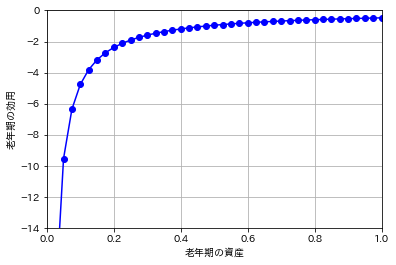

In [58]:
# 効用関数の図を描く
fig, ax = plt.subplots()
ax.plot(params.grid_a,util2,c="b",marker="o")
ax.set(xlim=(0,1),ylim=(-14,0),xlabel="老年期の資産",ylabel="老年期の効用")
ax.grid()
plt.show()

### 空の変数を作る
* ゼロが入っている変数：器の役割
    * ここに計算結果を代入していく
* 変数のサイズを予め決めておく点が重要
    * 計算途中でベクトルや行列のサイズが変わるような書き方をすると計算速度が**大幅に**低下する

In [59]:
# 配列(変数)をあらかじめ定義しておく
obj = np.zeros((params.na, params.nw)) # 目的関数
pol = np.zeros(params.nw) # 政策関数

## 今回のアルゴリズムの中心
* テキスト(2.5)式を計算

In [118]:
# あらゆる(w,a)の組み合わせについて生涯効用を計算

for i in range(params.nw):
    for j in range(params.na):
        
        cons = params.grid_w[i] - params.grid_a[j]
        
        if cons > 0.0:
            obj[j, i] = CRRA(cons, params.γ) + params.β*CRRA((1.0+params.rent)*params.grid_a[j], params.γ)
        else:
            # 消費が負値の場合、ペナルティを与えてその値が選ばれないようにする
            obj[j,i] = -10000.0

---

## Tips：ループ(繰り返し計算)とは?

In [119]:
# これを計算したいけど書くのが面倒
temp = 1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10

In [122]:
# (注意) Pythonのrange(n)は0~n-1の整数を等差1で返す。
a = 0
for i in range(10):
    a = a + (i+1) # =は同じではなく代入
print(a)

55


In [124]:
# 下記のような書き方も出来る
a = 0
for i in range(10):
    a += i+1 # =は同じではなく代入
print(a)

55


---

In [126]:
# 各wについて生涯効用を最大とするようなaを探す

for i in range(params.nw):

    maxl = np.argmax(obj[:,i]) # 最大値がある場所を探す
    maxv = obj[maxl,i] # そのmaximizerから最大値を求める

    # policy：最適貯蓄
    pol[i] = params.grid_a[maxl]

print(pol)

[0.025 0.075 0.1   0.15  0.175 0.225 0.25  0.275 0.325 0.35 ]


In [127]:
help(np.argmax)

Help on function argmax in module numpy:

argmax(a, axis=None, out=None)
    Returns the indices of the maximum values along an axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    
    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as `a.shape`
        with the dimension along `axis` removed.
    
    See Also
    --------
    ndarray.argmax, argmin
    amax : The maximum value along a given axis.
    unravel_index : Convert a flat index into an index tuple.
    take_along_axis : Apply ``np.expand_dims(index_array, axis)``
                      from argmax to an array as if by calling max.
    
    Notes
    ----

## これまでの計算過程をまとめて一つの関数にする

In [152]:
def discretize(params):
    """
    2期間モデルを離散化によって解く

    # インプット
    `m::Models`::パラメータの構造体

    # アウトプット
    `obj::Vector`::価値関数
    `pol::Vector`::政策関数
    """

    # 配列をあらかじめ定義しておく
    obj = np.zeros((params.na, params.nw))
    pol = np.zeros(params.nw) # 政策関数

    # あらゆる(w,a)の組み合わせについて生涯効用を計算
    for i in range(params.nw):
        for j in range(params.na):
            
            cons = params.grid_w[i] - params.grid_a[j]
        
            if cons > 0.0:
                obj[j,i] = CRRA(cons, params.γ) + params.β*CRRA((1.0+params.rent)*params.grid_a[j], params.γ)
            else:
                # 消費が負値の場合、ペナルティを与えてその値が選ばれないようにする
                obj[j,i] = -10000.0

    # 各wについて生涯効用を最大とするようなaを探す
    for i in range(params.nw):

        maxl = np.argmax(obj[:,i]) # 最大値がある場所を探す
        maxv = obj[maxl,i] # そのmaximizerから最大値を求める

        # policy：最適貯蓄
        pol[i] = params.grid_a[maxl]

    return obj, pol

## 実際に計算をしてみる

In [153]:
# 関数の実行
obj, pol = discretize(params)
print(pol)

[0.025 0.075 0.1   0.15  0.175 0.225 0.25  0.275 0.325 0.35 ]


---

In [140]:
# 計算速度を測る場合、time関数を使う
# ⬇の書き方で計算時間を測ってくれる

import time

start = time.time() # 計測開始
obj, pol = discretize(params)
end = time.time() - start # 計測終了

print(f"{end:.6} seconds") # 計算時間を出力する

0.00100088 seconds


---

## 計算結果を出力してみよう

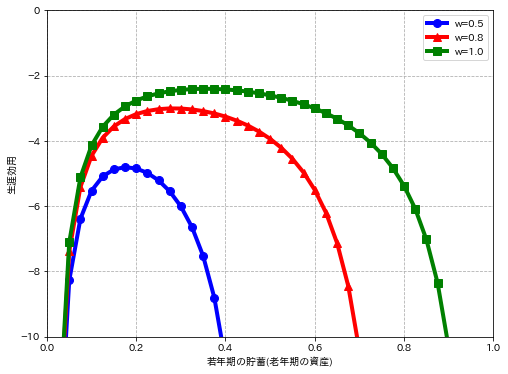

In [177]:
# 図2.1(a)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(params.grid_a, obj[:,4], c="b", marker="o", label="w=0.5", lw=4, ms=8)
ax.plot(params.grid_a, obj[:,7], c="r", marker="^", label="w=0.8", lw=4, ms=8)
ax.plot(params.grid_a, obj[:,9], c="g", marker="s", label="w=1.0", lw=4, ms=8)
ax.set(xlabel="若年期の貯蓄(老年期の資産)", ylabel="生涯効用", xlim=(0,1), ylim=(-10,0))
ax.legend()
ax.grid(ls="--")
plt.show()

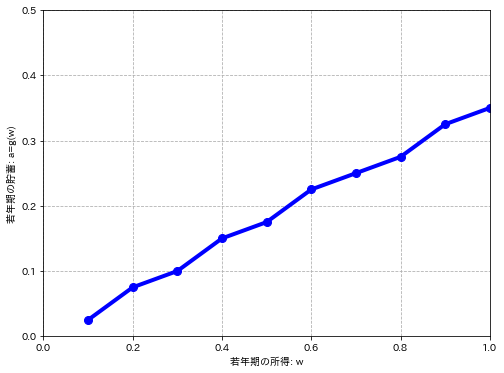

In [186]:
# 図2.1(b)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(params.grid_w, pol, c="b", marker="o", lw=4, ms=8)
ax.set(xlabel="若年期の所得: w", ylabel="若年期の貯蓄: a=g(w)", xlim=(0,1), ylim=(0,0.5))
ax.grid(ls="--")
plt.show()

---

## エクササイズ
* グリッドの数を増やして、政策関数の精度を高めてみよう。